<a href="https://colab.research.google.com/github/Byung-seok/code_snippet_/blob/main/sprint_train_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import tensorflow as tf
import io
from google.colab import files
from google.colab import drive
from os import path

In [11]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name} with length {length} bytes'.format(name = fn, length = len(uploaded[fn])))

Saving 220406_210418-220331_all.csv to 220406_210418-220331_all (1).csv
User uploaded file "220406_210418-220331_all.csv with length 39063686 bytes


In [23]:
raw_dataset = pd.read_csv(io.StringIO(uploaded['220406_210418-220331_all.csv'].decode('cp949')))

In [24]:
raw_dataset

,규격약호,제품사이즈,Interval,압연계상연도,압연계상월,압연계상일,추출온도,재로시간,디스케일러1 압력,조압연 롤냉각수 개도율,...,Zone2WZ4압력,2-4 2차밸브,Zone2 공급압력,Zone3WZ1유량,Zone3WZ1압력,3-1 2차밸브,Zone3WZ2유량,Zone3WZ2압력,3-2 2차밸브,Zone3 공급압력
0,SWRCH10A,7.0,3600.0,2021,4,20,1150.0,151.0,216.0,52.00,...,0.8,1,3.50,1115.5,1.1,4,1095.9,1.2,4,3.92
1,SWRCH10A,7.0,1861.0,2021,4,20,1131.0,187.0,216.0,52.00,...,0.9,1,3.53,608.4,0.5,3,642.4,0.7,3,4.07
2,SWRCH10A,7.0,517.0,2021,4,20,1126.0,192.0,213.0,52.00,...,0.9,1,3.54,614.5,0.5,3,637.5,0.7,3,4.08
3,SWRCH25K,7.0,293.0,2021,4,20,1131.0,197.0,211.0,52.00,...,0.7,1,3.58,650.1,0.6,3,676.4,0.8,3,3.91
4,S1021B,7.0,208.0,2021,4,20,1132.0,202.0,214.0,52.00,...,0.8,1,3.47,802.1,0.9,3,817.4,1.1,3,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77577,SWRCH45K,19.0,12.0,2022,4,1,1152.0,91.0,220.0,49.68,...,0.1,1,4.09,2191.8,2.5,4,2231.2,1.7,4,4.09
77578,SWRCH45K,19.0,10.0,2022,4,1,1151.0,96.0,220.0,49.66,...,0.1,1,4.11,2189.1,2.5,4,2229.2,1.7,4,4.12
77579,SWRCH45K,19.0,9.0,2022,4,1,1150.0,96.0,217.0,49.63,...,0.1,1,4.11,2176.5,2.5,4,2220.1,1.7,4,4.08
77580,SWRCH45K,19.0,10.0,2022,4,1,1151.0,90.0,219.0,49.76,...,0.1,1,4.11,2180.8,2.5,4,2210.1,1.7,4,4.04


In [19]:
notebooks_dir_name = 'Colab Notebooks'
drive.mount('/content/gdrive')
notebooks_base_dir = path.join('./gdrive/My Drive/', notebooks_dir_name)
if not path.exists(notebooks_base_dir):
  print('Check your google drive directory. See you file explorer')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with open(path.join(notebooks_base_dir, "myfile.txt"), "w") as f:
    f.write("Google Colab is good!!!")

In [22]:
df.to_csv('./gdrive/My Drive/Colab Notebooks/wb', index = False)

In [25]:
def show_null(df):
    null_count = 0
    for ind, key in enumerate(raw_dataset.keys()):
        if len(raw_dataset[raw_dataset[key].isnull()].index.tolist()) != 0:
            print(f'key {ind} : {key}')
            print(f'null counts {len(raw_dataset[raw_dataset[key].isnull()].index.tolist())}')
            null_count += 1
    if null_count == 0:
        print('null 값이 포함된 영역이 존재하지 않습니다.')
        # df[key].isnull().sum() # 결측치 값들을 뽑아내서 개수를 셈
        
def convert_str_to_N(df):
    keys = []
    for ind, key in enumerate(raw_dataset.keys()):
        len_ = len(raw_dataset[raw_dataset[key].replace(".*", np.nan, regex = True).isnull()].index.tolist())
        if len_ == len(raw_dataset[key]):
            print(f'key {ind} : [key]')
            print(f'null counts {len_}')
            keys.append(key)
    print(f'{keys}')
    return keys

In [26]:
show_null(raw_dataset)

key 2 : Interval
null counts 7
key 6 : 추출온도
null counts 8
key 7 : 재로시간
null counts 8
key 8 : 디스케일러1 압력
null counts 7
key 11 : RM R/T 커버
null counts 1
key 12 : IM R/T 커버
null counts 2
key 19 : 권취온도
null counts 7
key 76 : RM후단면적
null counts 252
key 77 : STD18후단면적
null counts 42
key 78 : PFM후단면적
null counts 40
key 79 : NTM후단면적
null counts 41
key 80 : RSM후단면적
null counts 43


In [27]:
convert_str_to_N(raw_dataset)

key 0 : [key]
null counts 77582
key 11 : [key]
null counts 77582
key 12 : [key]
null counts 77582
['규격약호', 'RM R/T 커버', 'IM R/T 커버']


['규격약호', 'RM R/T 커버', 'IM R/T 커버']

In [28]:
raw_dataset = raw_dataset.dropna()
raw_dataset.reset_index(inplace = True, drop = True)

In [29]:
show_null(raw_dataset)

null 값이 포함된 영역이 존재하지 않습니다.


In [30]:
raw_dataset

,규격약호,제품사이즈,Interval,압연계상연도,압연계상월,압연계상일,추출온도,재로시간,디스케일러1 압력,조압연 롤냉각수 개도율,...,Zone2WZ4압력,2-4 2차밸브,Zone2 공급압력,Zone3WZ1유량,Zone3WZ1압력,3-1 2차밸브,Zone3WZ2유량,Zone3WZ2압력,3-2 2차밸브,Zone3 공급압력
0,SWRCH10A,7.0,3600.0,2021,4,20,1150.0,151.0,216.0,52.00,...,0.8,1,3.50,1115.5,1.1,4,1095.9,1.2,4,3.92
1,SWRCH10A,7.0,1861.0,2021,4,20,1131.0,187.0,216.0,52.00,...,0.9,1,3.53,608.4,0.5,3,642.4,0.7,3,4.07
2,SWRCH10A,7.0,517.0,2021,4,20,1126.0,192.0,213.0,52.00,...,0.9,1,3.54,614.5,0.5,3,637.5,0.7,3,4.08
3,SWRCH25K,7.0,293.0,2021,4,20,1131.0,197.0,211.0,52.00,...,0.7,1,3.58,650.1,0.6,3,676.4,0.8,3,3.91
4,S1021B,7.0,208.0,2021,4,20,1132.0,202.0,214.0,52.00,...,0.8,1,3.47,802.1,0.9,3,817.4,1.1,3,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77262,SWRCH45K,19.0,12.0,2022,4,1,1152.0,91.0,220.0,49.68,...,0.1,1,4.09,2191.8,2.5,4,2231.2,1.7,4,4.09
77263,SWRCH45K,19.0,10.0,2022,4,1,1151.0,96.0,220.0,49.66,...,0.1,1,4.11,2189.1,2.5,4,2229.2,1.7,4,4.12
77264,SWRCH45K,19.0,9.0,2022,4,1,1150.0,96.0,217.0,49.63,...,0.1,1,4.11,2176.5,2.5,4,2220.1,1.7,4,4.08
77265,SWRCH45K,19.0,10.0,2022,4,1,1151.0,90.0,219.0,49.76,...,0.1,1,4.11,2180.8,2.5,4,2210.1,1.7,4,4.04


In [31]:
SAE9254_dataset = raw_dataset[raw_dataset['규격약호'].isin(['SAE9254W-SI','SAE9254W-M1','SAE9254W-M2']) & (raw_dataset['제품사이즈'] > 11.5)]

In [32]:
SAE9254_dataset.reset_index(inplace = True, drop = True)

In [33]:
SAE9254_dataset

,규격약호,제품사이즈,Interval,압연계상연도,압연계상월,압연계상일,추출온도,재로시간,디스케일러1 압력,조압연 롤냉각수 개도율,...,Zone2WZ4압력,2-4 2차밸브,Zone2 공급압력,Zone3WZ1유량,Zone3WZ1압력,3-1 2차밸브,Zone3WZ2유량,Zone3WZ2압력,3-2 2차밸브,Zone3 공급압력
0,SAE9254W-SI,18.0,510.0,2021,5,3,977.0,262.0,207.0,48.03,...,0.1,1,3.48,516.7,1.2,2,307.5,0.5,1,5.05
1,SAE9254W-SI,18.0,106.0,2021,5,3,974.0,262.0,209.0,48.02,...,0.1,1,3.47,515.6,1.2,2,306.4,0.5,1,5.05
2,SAE9254W-SI,18.0,9.0,2021,5,3,974.0,257.0,211.0,48.04,...,0.1,1,3.47,515.3,1.2,2,306.2,0.5,1,5.05
3,SAE9254W-SI,18.0,8.0,2021,5,3,975.0,252.0,208.0,47.98,...,0.1,1,3.48,514.7,1.2,2,306.5,0.5,1,5.05
4,SAE9254W-SI,18.0,8.0,2021,5,3,974.0,252.0,208.0,47.99,...,0.1,1,3.48,513.0,1.2,2,307.4,0.5,1,5.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,SAE9254W-SI,19.0,11.0,2022,3,31,973.0,91.0,220.0,45.09,...,0.1,1,4.09,615.2,0.4,2,611.6,0.4,2,4.05
11774,SAE9254W-SI,19.0,10.0,2022,3,31,971.0,91.0,225.0,45.07,...,0.1,1,4.09,593.5,0.3,2,606.3,0.4,2,3.99
11775,SAE9254W-SI,19.0,11.0,2022,3,31,969.0,96.0,219.0,45.03,...,0.1,1,4.09,604.5,0.4,2,615.0,0.4,2,3.90
11776,SAE9254W-SI,19.0,11.0,2022,3,31,967.0,96.0,222.0,45.06,...,0.1,1,4.11,607.0,0.4,2,614.7,0.4,2,3.91


In [34]:
test_start_idx = SAE9254_dataset[(SAE9254_dataset['압연계상연도'] == 2022) & ((SAE9254_dataset['압연계상월'] == 3) | (SAE9254_dataset['압연계상월'] == 4))].index[0]

In [35]:
SAE9254_dataset.drop(['RM입측소재온도','IM2출측소재온도','PFM#2출측소재온도','NTM출측온도','RSM입측온도','권취온도','NTM SPEED','RSM SPEED','Stand23사용량','Stand24사용량',
              'Stand25사용량','Stand26사용량','Stand27사용량','Stand28사용량','Stand29사용량','Stand30사용량','Stand31사용량','Stand32사용량','Stand33사용량',
              'Stand34사용량','NTM후단면적','RSM후단면적','RM R/T 커버','IM R/T 커버','압연계상연도','압연계상월','압연계상일','규격약호',
              #'Zone1WZ1압력','1-1 2차밸브','Zone1WZ2유량','Zone1WZ2압력','1-2 2차밸브',
              'Zone2WZ1유량','Zone2WZ1압력','2-1 2차밸브','Zone2WZ2유량','Zone2WZ2압력','2-2 2차밸브',
              'Zone2WZ3유량','Zone2WZ3압력','2-3 2차밸브','Zone2WZ4유량','Zone2WZ4압력','2-4 2차밸브','Zone2 공급압력',
              'Zone3WZ1유량','Zone3WZ1압력','3-1 2차밸브','Zone3WZ2유량','Zone3WZ2압력','3-2 2차밸브','Zone3 공급압력'
            ,'STAND 1 SPEED','STAND 2 SPEED','STAND 3 SPEED','STAND 4 SPEED','STAND 5 SPEED','STAND 6 SPEED','STAND 7 SPEED','STAND 8 SPEED'
            ,'STAND 9 SPEED','STAND 10 SPEED','STAND 11 SPEED','STAND 12 SPEED','STAND 13 SPEED','STAND 14 SPEED','STAND 15 SPEED'
            ,'STAND 16 SPEED','STAND 17 SPEED','STAND 18 SPEED'
            ,'Stand1사용량','Stand2사용량','Stand3사용량','Stand4사용량','Stand5사용량','Stand6사용량','Stand7사용량','Stand8사용량','Stand9사용량'
            ,'Stand10사용량','Stand11사용량','Stand12사용량','Stand13사용량','Stand14사용량','Stand15사용량','Stand16사용량','Stand17사용량','Stand18사용량'
            ,'Stand19사용량','Stand20사용량','Stand21사용량','Stand22사용량','RM후단면적','STD18후단면적'
            ,'PFM2 SPEED'
             ],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
target = SAE9254_dataset['NTM입측온도']
dataset = SAE9254_dataset.drop(['NTM입측온도'], axis = 1)

In [38]:
train_dataset = dataset.iloc[:test_start_idx]
train_target = target.iloc[:test_start_idx]
test_dataset = dataset.iloc[test_start_idx:]
test_target = target.iloc[test_start_idx:]

In [39]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

train_norm = norm(train_dataset)
test_norm = norm(test_dataset)

In [40]:
num_epochs = 300
size_batch = 4
rate_learning = 1e-3

config = {
    'str_model': 'mlp',
    'str_dataset': 'Waterbox',
    'num_epochs': num_epochs,
    'rate_learning': rate_learning,
    'size_batch': size_batch,
}

In [41]:
def build_network(input_shape):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(128, activation = 'relu', input_shape = input_shape))
    model.add(tf.keras.layers.Dense(32, activation = 'relu'))
    model.add(tf.keras.layers.Dense(16, activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=rate_learning), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])
    return model

In [42]:
model = build_network((train_norm.shape[1],))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(train_norm, train_target, epochs = num_epochs, batch_size = size_batch)

Epoch 1/300
2809/2809 [==============================] - 7s 2ms/step - loss: 68739.4688 - root_mean_squared_error: 262.1821
Epoch 2/300
2809/2809 [==============================] - 5s 2ms/step - loss: 1046.6072 - root_mean_squared_error: 32.3513
Epoch 3/300
2809/2809 [==============================] - 5s 2ms/step - loss: 498.4562 - root_mean_squared_error: 22.3261
Epoch 4/300
2809/2809 [==============================] - 5s 2ms/step - loss: 323.3624 - root_mean_squared_error: 17.9823
Epoch 5/300
2809/2809 [==============================] - 5s 2ms/step - loss: 267.5121 - root_mean_squared_error: 16.3558
Epoch 6/300
2809/2809 [==============================] - 5s 2ms/step - loss: 240.4471 - root_mean_squared_error: 15.5064
Epoch 7/300
2809/2809 [==============================] - 5s 2ms/step - loss: 236.0165 - root_mean_squared_error: 15.3628
Epoch 8/300
2809/2809 [==============================] - 5s 2ms/step - loss: 231.6299 - root_mean_squared_error: 15.2194
Epoch 9/300
2809/2809 [=====

In [44]:
model.predict(test_norm)

array([[ 951.27716],
       [ 949.5959 ],
       [ 945.5489 ],
       [ 946.58344],
       [ 965.0705 ],
       [ 977.7874 ],
       [ 981.71185],
       [ 982.7775 ],
       [ 982.0512 ],
       [ 981.87213],
       [ 981.9631 ],
       [ 981.2972 ],
       [ 981.3011 ],
       [ 980.0184 ],
       [ 980.5124 ],
       [ 983.5994 ],
       [ 983.1988 ],
       [ 981.38837],
       [ 981.9246 ],
       [ 983.4604 ],
       [ 980.62   ],
       [ 983.8818 ],
       [ 982.9124 ],
       [ 981.2632 ],
       [ 980.8099 ],
       [ 980.4172 ],
       [ 980.606  ],
       [ 980.7172 ],
       [ 980.8353 ],
       [ 980.4429 ],
       [ 981.2913 ],
       [ 982.7802 ],
       [ 982.12274],
       [ 982.0013 ],
       [ 981.0939 ],
       [ 983.091  ],
       [ 983.8239 ],
       [ 984.8111 ],
       [ 985.6985 ],
       [ 985.7336 ],
       [ 972.0849 ],
       [ 943.53033],
       [ 936.4598 ],
       [ 935.2633 ],
       [ 941.9217 ],
       [ 958.23004],
       [ 958.4652 ],
       [ 961.

In [45]:
test_target

11233    963
11234    948
11235    942
11236    959
11237    941
        ... 
11773    959
11774    951
11775    954
11776    959
11777    962
Name: NTM입측온도, Length: 545, dtype: int64

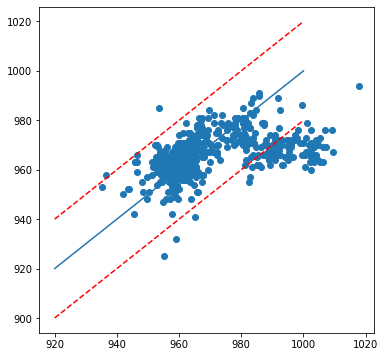

In [46]:
plt.figure(figsize = (6,6))
plt.scatter(model.predict(test_norm), test_target)
_ = plt.plot([920, 1000], [920, 1000])
_ = plt.plot([920, 1000], [900, 980], 'r--')
_ = plt.plot([920, 1000], [940, 1020], 'r--')
# plt.xlim([920,1000])
# plt.ylim([920,1000])
plt.show()

In [47]:
model.evaluate(test_norm, test_target)

18/18 [==============================] - 0s 2ms/step - loss: 198.7504 - root_mean_squared_error: 14.0979


[198.75038146972656, 14.097886085510254]

In [48]:
pred_values = model.predict(test_norm)
pred_success = 0

for i in range(len(test_target)):
    if ((test_target.values[i] - 20) <= pred_values[i][0]) & ((test_target.values[i] + 20) >= pred_values[i][0]):
        pred_success += 1
        
pred_success_rate = pred_success / len(test_target) * 100
print(f'소재 온도 예측 성공률(±20℃): {pred_success_rate}')

소재 온도 예측 성공률(±20℃): 81.8348623853211
